In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing `stat_mailjet.xlsx`

The `stat_mailjet` file has 249,489 rows and 11 columns 

In [2]:
sent_mails = pd.read_excel("stat_mailjet.xlsx")
sent_mails.shape

(249489, 11)

In [3]:
sent_mails.head()

,Unnamed: 0,id,email,open,click,sent,bounce,blocked,spam,unsub,total
0,0,1,d345b2515a0b71245d55f02b30b4195c01248abc89d07a...,84,5,87,0,0,0,0,87
1,1,1488786205,0ba610308e1f8b21c073666dff3552445671604e4828e3...,3,0,32,0,0,0,0,32
2,2,1488786206,b4f0173422313478eb256fb09b78dc6c305c92540b59dd...,3,0,9,0,0,0,1,9
3,3,1488786207,35ae1e1ced2315c89951b11b3455b89b054b34d0b28445...,2,0,2,0,0,0,0,2
4,4,1488786208,4effed70c78fa5cf91ac436da9e2c209f52ad9be4f869a...,0,0,0,2,8,0,0,10


In [4]:
sent_mails["Unnamed: 0"].value_counts()

2047      1
135703    1
221753    1
223800    1
201271    1
         ..
83330     1
89473     1
87424     1
175359    1
0         1
Name: Unnamed: 0, Length: 249489, dtype: int64

In [5]:
sent_mails["id"].value_counts()

1490550783    1
1503236929    1
1511164951    1
1511164950    1
1511164949    1
             ..
1522925722    1
1522925721    1
1490597524    1
1522925719    1
1490550784    1
Name: id, Length: 249489, dtype: int64

In [6]:
sent_mails["email"].value_counts()

e8338366cfe5f6570e9e7366305ab1abb92f282307ee9114f4ef484bdc2cd450    1
37c9cc4389d2d489b933129cf28cd1bf268294f2db413911547c6ecc89b6ce50    1
727d02ce186f60c870cc47d25241b5ea2315ef80a89c471e9022b9ae320e1b8d    1
f83206051c0a95c99685023dbcef076480226722782d14c996b02efab2c9921e    1
2ae6dd71dcdb6d2d910b57210616cf24a7aeed869251963d7b8afaaa7ca10f92    1
                                                                   ..
947031fb141d260b1bac221d66168f25a70157e6c15f4d453ca041b76c0ac371    1
2c5bb23c7cf906b6ebca8a94e49e457034935a98549ed085717224ab0bd46e79    1
934c739c7851ce46ca29d11dbaed853dfa4be9442b3d6f3d4278e6e6d6975eec    1
85b34925dca5dcb983c4b12130312a516cfeb41ef7c9317dca6b4e9d0ac8537e    1
05e01b725e848916ba2b029634ffa0f59fd1718632d80587d3abb18b92aa48dc    1
Name: email, Length: 249489, dtype: int64

As we can see, each of the first 3 columns uniquely identify rows. So, we can drop 2 of them and keep only `id` as the row identifier.

In [7]:
sent_mails = sent_mails.drop(columns=['Unnamed: 0', 'email'])
sent_mails.head()

,id,open,click,sent,bounce,blocked,spam,unsub,total
0,1,84,5,87,0,0,0,0,87
1,1488786205,3,0,32,0,0,0,0,32
2,1488786206,3,0,9,0,0,0,1,9
3,1488786207,2,0,2,0,0,0,0,2
4,1488786208,0,0,0,2,8,0,0,10


Fortunately, this table does not have any missing values.

In [8]:
sent_mails.isna().sum()

id         0
open       0
click      0
sent       0
bounce     0
blocked    0
spam       0
unsub      0
total      0
dtype: int64

## Total calculation
Now, I want to see how the `total` column was computed by counting the proportion of mismatches. This [post](https://sendgrid.com/blog/delivered-bounced-blocked-and-deferred-emails-what-does-it-all-mean/) explains that there are several outcomes when one sends an email:

1. **Delivered** – the receiving server accepted the message;
2. **Bounce** – the receiving server denied the message because the email has not reached the intended address for some reason;
3. **Blocked** – the receiving server denied the message;
4. **Deferred** – the receiving server delayed acceptance of the message.

When a message is delivered, a server either delivers the message to the intended inbox or sends it to the spam folder.

In [9]:
100 * np.average(sent_mails.sent + sent_mails.bounce + sent_mails.blocked != sent_mails.total)

3.6879381455695444

As we can see, we either have a data entry problem or the message was deferred (about which we have no info) 3.7% of the time.

In [10]:
sent_mails[sent_mails.total == 0]

,id,open,click,sent,bounce,blocked,spam,unsub,total
726,1490243151,0,0,0,0,0,0,0,0
806,1490243232,0,0,0,0,0,0,0,0
911,1490243337,0,0,0,0,0,0,0,0
922,1490243348,0,0,0,0,0,0,0,0
88460,1492093782,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
246756,1522972183,0,0,0,0,0,0,0,0
246757,1522972184,0,0,0,0,0,0,0,0
246758,1522972185,0,0,0,0,0,0,0,0
246759,1522972186,0,0,0,0,0,0,0,0


There are 31,225 rows full of zeros. These rows do not convey any useful information. Therefore, we are going to drop them.

In [11]:
sent_mails = sent_mails[sent_mails.total != 0]
sent_mails.shape

(218264, 9)

Now, we have 218,264 nonzero rows to analyze.

In [12]:
100 * np.average(sent_mails.sent == sent_mails.total)

68.6957079500055

In [13]:
100 * np.average(sent_mails.bounce > 0)

26.135322361910347

In [14]:
100 * np.average(sent_mails.blocked > 0)

7.586225854927978

So, all our emails are successfully delivered 68.7% of the time.

In [50]:
100 * sum(sent_mails.open) / sum(sent_mails.total)

14.610820114879148

In [51]:
100 * sum(sent_mails.click) / sum(sent_mails.total)

1.1577779856003894

On average, potential donors open our emails 14.6% of the time and click on the link **1.2%** of the time.

In [17]:
sum(sent_mails.open > 0) / sum(sent_mails.total != 0)

0.6595544844775135

In [18]:
sum(sent_mails.click > 0) / sum(sent_mails.total != 0)

0.19875013744822784

Surprisingly, almost 66% of people open and nearly 20% click on the link in our emails at least once. So, what is the reasons for the very low click rate shown above (1.2%)?

In [19]:
sent_mails.click.corr(sent_mails.total) 

0.1908696843202113

In [20]:
sent_mails.open.corr(sent_mails.total) 

0.33571381305795345

In [21]:
sent_mails.spam.corr(sent_mails.total) 

0.013365259739202285

In [22]:
sent_mails.blocked.corr(sent_mails.total) 

0.09587756584112034

There is a positive correlation between the number of opened emails/clicks and the number of total emails sent. However, the correlation is very weak for clicks (19%).

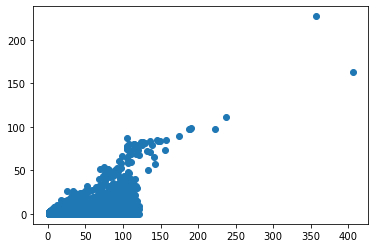

In [23]:
fig, ax = plt.subplots()
ax.scatter(sent_mails.total, sent_mails.click)
plt.show()

In [24]:
sent_mails.to_csv("sent_mails.csv", index = False)

## Importing `Dons_2018.xlsx`

In [25]:
dons_2018 = pd.read_excel("Dons_2018.xlsx")
dons_2018.shape

(152435, 13)

In [26]:
dons_2018.isna().sum()

Batch number                0
Receipt date                0
contact ID                  0
Amount of transaction    1486
cam code                    0
Operation                   0
Segment                     0
Movement Id                 0
Ventilation Id              0
oft code                    0
payment method            733
ventilation amount          0
RF                          0
dtype: int64

In [27]:
dons_2018[dons_2018["Amount of transaction"].isna()] ## can be dropped

,Batch number,Receipt date,contact ID,Amount of transaction,cam code,Operation,Segment,Movement Id,Ventilation Id,oft code,payment method,ventilation amount,RF
63353,42551,2018-05-22,705928,NaN,O,O109,O109,2009318,3215279,SIGN,SIGN,0.0,Non
76324,42651,2018-06-10,705928,NaN,O,O110,O110,2022303,3228267,SIGN,NaN,0.0,Non
76325,42651,2018-06-10,124106,NaN,O,O110,O110,2022304,3228268,SIGN,NaN,0.0,Non
76326,42651,2018-06-10,1364860,NaN,O,O110,O110,2022305,3228269,SIGN,NaN,0.0,Non
76327,42651,2018-06-10,1341080,NaN,O,O110,O110,2022306,3228270,SIGN,NaN,0.0,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138155,43433,2018-11-15,926915,NaN,ADH,ADH2019,ADH19PA,2087446,3293454,COTI,SIGN,0.0,Oui
138156,43433,2018-11-15,178907,NaN,ADH,ADH2019,ADH19PA,2087447,3293455,COTI,SIGN,0.0,Oui
138157,43433,2018-11-15,711188,NaN,ADH,ADH2019,ADH19PA,2087448,3293456,COTI,SIGN,0.0,Oui
138158,43433,2018-11-15,155958,NaN,ADH,ADH2019,ADH19PA,2087449,3293457,COTI,SIGN,0.0,Oui


In [28]:
dons_2018 = dons_2018[~dons_2018["Amount of transaction"].isna()]

In [29]:
dons_2018[dons_2018["Amount of transaction"] != dons_2018["ventilation amount"]]

,Batch number,Receipt date,contact ID,Amount of transaction,cam code,Operation,Segment,Movement Id,Ventilation Id,oft code,payment method,ventilation amount,RF
11479,41770,2018-01-08,10037,60.0,ADH,ADH2018,ADH2018,1921558,3127486,COTI,CH,15.0,Oui
11480,41770,2018-01-08,10037,60.0,ADH,ADH2018,ADH2018,1921558,3127487,DON,CH,45.0,Oui
11649,41867,2018-01-16,210371,50.0,IA,IA123,IA123,1922950,3128881,COTI,CH,15.0,Oui
11650,41867,2018-01-16,210371,50.0,IA,IA123,IA123,1922950,3128882,DON,CH,35.0,Oui
11670,41884,2018-01-19,278627,50.0,IA,IA123,IA123,1922980,3128912,COTI,CH,15.0,Oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152319,43803,2018-12-31,704283,80.0,IA,IA125,IA125,2113428,3319480,DON,CH,65.0,Oui
152328,43821,2018-12-31,786485,100.0,IA,IA125,IA125,2113534,3319586,DON,CH,85.0,Oui
152329,43821,2018-12-31,786485,100.0,IA,IA125,IA125,2113534,3319587,COTI,CH,15.0,Oui
152420,43860,2018-12-31,960504,50.0,IA,IA125,IA125,2113701,3319755,DON,CH,35.0,Oui


In [66]:
dons_2018[(dons_2018["RF"] == "Non") & (dons_2018["Amount of transaction"] != 0)]

,Batch number,Receipt date,contact ID,Amount of transaction,cam code,Operation,Segment,Movement Id,Ventilation Id,oft code,payment method,ventilation amount,RF
38621,42574,2018-03-09,864573,2.50,DIV,DIV,DIV,2009410,3215372,DON,CH,2.50,Non
38625,43440,2018-03-12,1386304,2797.67,DIV,DIV,DIV,2087597,3293605,DON,DONNAT,2797.67,Non
64794,42867,2018-05-29,829300,415.00,URGENCE,HUMACATFUND,HUMACATFUND,2034871,3240864,DON,ESP,415.00,Non
76508,42785,2018-06-29,244287,8.00,O,O110,O110DA,2022627,3228595,ACH,CH,8.00,Non
76509,42785,2018-06-29,244287,8.00,O,O110,O110DA,2022627,3228596,SIGN,CH,0.00,Non
76511,42785,2018-06-29,2380,100.00,O,O110,O110PACL,2022628,3228598,ACH,CH,9.60,Non
76513,42785,2018-06-29,48979,10.00,O,O110,O110PACL,2022629,3228600,ACH,CH,8.00,Non
76516,42785,2018-06-29,19627,10.00,O,O110,O110PACL,2022631,3228603,ACH,CH,8.00,Non
76517,42785,2018-06-29,76065,8.00,O,O110,O110ADH,2022632,3228604,SIGN,CH,0.00,Non
76518,42785,2018-06-29,76065,8.00,O,O110,O110ADH,2022632,3228605,ACH,CH,8.00,Non


In [30]:
dons_2018[dons_2018["Operation"] != dons_2018["Segment"]]

,Batch number,Receipt date,contact ID,Amount of transaction,cam code,Operation,Segment,Movement Id,Ventilation Id,oft code,payment method,ventilation amount,RF
2,41742,2018-01-01,338324,100.0,O,O108,O108TM,1909874,3115792,DON,CB,100.0,Oui
6,41743,2018-01-02,848294,15.0,ADH,ADH2018,ADH2018WEB,1909878,3115796,COTI,CB,15.0,Oui
7,41749,2018-01-03,31103,30.0,F,F2018R,F18RDA,1909912,3115832,DON,CH,30.0,Oui
8,41762,2018-01-05,280660,20.0,F,F2018R,F18RDP,1910024,3115950,DON,CH,20.0,Oui
9,41762,2018-01-05,1647,40.0,F,F2018R,F18RADH,1910025,3115951,DON,CH,40.0,Oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152430,43876,2018-12-31,117921,20.0,F,F20183,F183ADH,2113732,3319790,DON,CH,20.0,Oui
152431,43912,2018-12-31,36745,500.0,F,F2019R,F19RDA,2113880,3319939,DON,CH,500.0,Oui
152432,43912,2018-12-31,429744,33.0,F,F2019R,F19RDA,2113881,3319940,DON,CH,33.0,Oui
152433,43912,2018-12-31,278503,60.0,F,F20183,F183DA,2113882,3319941,DON,CH,60.0,Oui


In [31]:
dons_2018[dons_2018["Movement Id"] == 2009196]

,Batch number,Receipt date,contact ID,Amount of transaction,cam code,Operation,Segment,Movement Id,Ventilation Id,oft code,payment method,ventilation amount,RF
63240,42527,2018-05-18,30989,70.0,ADH,ADH2018,ADH2018,2009196,3215150,COTI,CH,15.0,Oui
63241,42527,2018-05-18,30989,70.0,ADH,ADH2018,ADH2018,2009196,3215151,COTI,CH,15.0,Oui
63242,42527,2018-05-18,30989,70.0,ADH,ADH2018,ADH2018,2009196,3215152,DON,CH,40.0,Oui


In [32]:
dons_2018["contact ID"].value_counts()

291877     23
34358      21
811250     18
15498      16
143792     16
           ..
105373      1
1340140     1
1372976     1
1356532     1
790530      1
Name: contact ID, Length: 25715, dtype: int64

In [33]:
dons_2018.sort_values("Receipt date")

,Batch number,Receipt date,contact ID,Amount of transaction,cam code,Operation,Segment,Movement Id,Ventilation Id,oft code,payment method,ventilation amount,RF
0,41742,2018-01-01,759409,10.0,SITE,SITEVA,SITEVA,1909872,3115790,DON,CB,10.0,Oui
11553,41790,2018-01-01,994686,200.0,WTR,WTR2018,WTR2018PFD,1921748,3127678,DON,CB,200.0,Oui
11552,41790,2018-01-01,1325484,30.0,TW,TW2018,TW2018PFD,1921747,3127677,DON,CB,30.0,Oui
11551,41790,2018-01-01,1324351,20.0,TW,TW2018,TW2018PFD,1921746,3127676,DON,CB,20.0,Oui
11550,41790,2018-01-01,1324925,50.0,WTR,WTR2018,WTR2018PFD,1921745,3127675,DON,CB,50.0,Oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152067,43771,2018-12-31,1396031,50.0,PWEB,PWEB2018,PWEB2018,2101618,3307666,DON,CBW,50.0,Oui
152068,43771,2018-12-31,760226,150.0,SITE,SITE,SITE,2101619,3307667,DON,CBW,150.0,Oui
152069,43771,2018-12-31,149582,200.0,PWEB,PWEB2018,PWEB2018,2101620,3307668,DON,CBW,200.0,Oui
152063,43771,2018-12-31,1396056,100.0,TW,TW2019,TW2019PFD,2101614,3307662,DON,CBW,100.0,Oui


In [34]:
dons_2018.groupby("cam code")["ventilation amount"].sum().sort_values(ascending=False)

cam code
PA         1540317.04
TW          370262.59
WTR         133378.44
SITE         99768.60
F            66013.00
URGENCE      58503.65
IA           41952.00
PWEB         30332.44
DIV          21635.98
O            21582.00
RA           16724.00
RF           14875.50
FE            7444.00
ADH           6891.00
HF            4090.00
CIEL          3479.62
FTEL          2353.00
FMD            435.00
Name: ventilation amount, dtype: float64

In [68]:
dons_2018.groupby("cam code")["ventilation amount"].mean().sort_values(ascending=False)

cam code
WTR        103.394140
HF          99.756098
PWEB        94.493583
DIV         94.069478
RF          91.260736
F           87.783245
RA          74.328889
TW          72.986909
CIEL        72.492083
IA          65.858713
URGENCE     64.008370
FE          54.735294
O           54.362720
FTEL        49.020833
SITE        39.796011
ADH         36.078534
FMD         33.461538
PA          11.164711
Name: ventilation amount, dtype: float64

In [49]:
dons_2018[dons_2018.RF == "Non"]

,Batch number,Receipt date,contact ID,Amount of transaction,cam code,Operation,Segment,Movement Id,Ventilation Id,oft code,payment method,ventilation amount,RF
25802,41940,2018-02-01,982640,0.00,ADH,ADH2018,ADH2018,1949009,3154957,COTI,CH,0.00,Non
25803,41940,2018-02-01,194440,0.00,ADH,ADH2018,ADH2018,1949010,3154958,COTI,CH,0.00,Non
25804,41940,2018-02-01,79093,0.00,ADH,ADH2018,ADH2018,1949012,3154960,COTI,CH,0.00,Non
25805,41940,2018-02-01,295767,0.00,ADH,ADH2018,ADH2018,1949013,3154961,COTI,CH,0.00,Non
25806,41940,2018-02-01,80932,0.00,ADH,ADH2018,ADH2018,1949014,3154962,COTI,CH,0.00,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125937,43838,2018-10-11,788610,188.95,URGENCE,HUMACATFUND,HUMACATFUND,2113629,3319682,DON,ESP,188.95,Non
137406,43422,2018-11-21,829300,460.00,URGENCE,HUMACATFUND,HUMACATFUND_INDONESIA,2086695,3292703,DON,ESP,460.00,Non
138170,43439,2018-11-23,106873,8.00,O,O110,O110,2087469,3293477,ACH,CH,8.00,Non
152296,43800,2018-12-31,903134,0.00,ADH,ADH2019,ADH2019,2113405,3319455,COTI,CH,0.00,Non


In [60]:
pd.crosstab(dons_2018['cam code'], dons_2018['payment method'], margins=True)

payment method,CB,CBW,CH,DONNAT,ESP,PRE,VIR,All
cam code,,,,,,,,
ADH,75,10,104,0,2,0,0,191
CIEL,0,0,38,0,2,0,8,48
DIV,0,0,136,1,2,0,91,230
F,0,0,750,0,1,0,1,752
FE,49,87,0,0,0,0,0,136
FMD,0,0,13,0,0,0,0,13
FTEL,6,0,41,0,1,0,0,48
HF,0,0,35,0,0,0,6,41
IA,0,0,637,0,0,0,0,637
